# Utilizing Linear Programming to Eliminate Gerrymandering
### _Javier Palomares Tiffany Tillett_


## Background
Gerrymandering is the process of manipulating the boundaries of political districts to favor a particular party. When this occurs, there are cases where the majority of the population may vote with one party but the majority of the seats are with the other party. This should not occur. 

![alt text](https://img.washingtonpost.com/wp-apps/imrs.php?src=https://img.washingtonpost.com/blogs/wonkblog/files/2015/03/gerry.png&w=1484 "Gerrymandering Explained")

This project was a proof of concept using the state of Rhode Island to see whether linear programming could be used to draw legal, fair political districts without human influence to avoid the occurrence of the above mentioned scenario. 
Criteria
There are certain criteria to identify whether or not the political districting was done well. Some of those criteria are:
1. Integrity: Each territory must belong to exactly one district
2. Contiguity: All areas covered by a single district must be connected somehow
3. No enclaves: A single district should not surround another district.
4. Compactness: A district should not be unnecessarily spread out or odd shaped
5. Population equality: districts should contain a similar number of constituents

From these criteria, we can see that this is really an optimization problem. We want to form some assignment of census blocks to districts that satisfies the first three requirements and finds a good balance between compactness and population equality. We could also factor in whether the districts have balanced proportions of different ethnic groups and political preferences. Since this does boil down to an optimization problem, linear programming is the perfect tool to tackle this.

## First Attempt
In order to accomplish this, we first wrote constraints to cover integrity and wrote an objective function which covered compactness and population equality. At this stage, we did not explicitly cover enclaves or contiguity, hoping that compactness would indirectly satisfy these criteria. We used a network flow formulation to accomplish this where each “block” has an arc to each district center.

![alt text](first_attempt_network_flow.png)


### Variables:
* F  : where F<sub>ij</sub> is the number of people from block i assigned to district j
* X: a binary variable where X<sub>ij</sub> is 1 if block i is assigned to district j and 0 otherwise
* s: the population of the smallest district
* l: the population of the largest district
* g: the gap in size between the largest and smallest districts

### Parameters:
* d<sub>ij</sub> is the distance from block i to the center of district j. The district centers were calculated by solving another optimization problem to minimize the population weighted squared distances between electoral districts and meshblocks based on the current district assignments.
* p<sub>i</sub> is the population of block i
* c<sub>d</sub> is the component of the cost vector associated with compactness
* c<sub>p</sub> is the component of the cost vector associated with population equality


### Objective function
minimize: c<sub>d</sub> \* ∑<sub>ij</sub> (d<sub>ij</sub> \* p<sub>i</sub>) + c<sub>p</sub> \* g

### Constraints

* All people in the district must be assigned to a district
∑<sub>j</sub> (F<sub>ii</sub>= p<sub>i</sub>) 		for all i
* X must be 1 if the population flow is >0 and 0 otherwise
F<sub>ij</sub> <= M * X<sub>ij</sub>		for all i,j and some large M
* Find the smallest district population
s <= ∑<sub>i</sub> (F<sub>ij</sub>) 		for all j
* Find the largest district population
l >= ∑<sub>i</sub> (F<sub>ij</sub>) 		for all j
* g = l - s

## Results
### Population Results
| Category     | District 1    | District 2  | Total |
| :------------: |--------------:| -----------:|------:|
| Total Population | 669780 | 382787 | 1052567 |
| Percentage White | 74.99 | 92.63 | 81.41 |
| Percentage Black | 7.85 | 1.99 | 5.72 |
| Percentage Asian | 3.50 | 1.83 | 2.89 |
| Percentage American Indian or Alaska Native | 0.63 | 0.48 | 0.58 |
| Percentage Native Hawaiian or other Pacific Islandar| 0.06 | 0.03 | 0.05 |
| Percentage Other | 8.90 | 1.05 | 6.05 |
| Percentage Mixed | 4.06 | 1.98 | 3.30 |

### Political Results (Based on 2012 Presidential Election)
| Category     | District 1    | District 2  | Total |
| :------------: |--------------:| -----------:|------:|
| Percentage Obama  | 66.58 | 60.84 | 63.85 |
| Percentage Romney | 33.42 | 39.16 | 36.15 |

### Resulting Map

![alt text](resulting_map.jpg)
We can see that there is some mixing of the blue and magenta which violates the contiguity requirement. We can also see that the population results are not quite balanced. Let’s revise our formulation to include constraints that resolve this and also achieve better population equity.

## Second Attempt

### Variables
We will first introduce some additional variables:
* y: where y<sub>ijk</sub> indicates the amount of flow from block i to block j for district k
* w: where w<sub>ik</sub> is 1 if block i is the hub for district k and 0 otherwise
Note: a block i can be considered a hub of district j if block i can be reached by all other blocks in district j

And some additional parameters:
* p: the target population of each district which in this case is simply the total population divided by the number of districts
* n: the total number of blocks
* 𝛼: tolerance on each district's population deviation from p

### Constraints
Now we can add our contiguity constraints and population constraints:
* Each district must have exactly one hub
∑<sub>i</sub> (w<sub>ik</sub>) = 1	for all k
* Flow constraint: flow into block i cannot be greater than the total number of blocks
∑<sub>j</sub> (y<sub>ijk</sub>) <= (n - 1) X<sub>ik</sub> for all k,i and for all j neighbors of i
* Lower bound on district population
∑<sub>i</sub> p<sub>i</sub> * X<sub>ik</sub> >= (1 - 𝛼) p  for all k
* Upper bound on district population
∑<sub>i</sub> p<sub>i</sub> * X<sub>ik</sub> <= (1 + 𝛼) p	for all k
## Revised Results
### Population Results
| Category     | District 1    | District 2  | Total |
| :------------: |--------------:| -----------:|------:|
| Total Population | 531514 | 521053 | 1052567 |
| Percentage White | 70.65| 92.63 | 81.41 |
| Percentage Black | 9.39 | 1.98 | 5.72 |
    | Percentage Asian | 3.78 | 1.99 | 2.89 |
| Percentage American Indian or Alaska Native | 0.74 | 0.41 | 0.58 |
| Percentage Native Hawaiian or other Pacific Islandar| 0.07 | 0.03 | 0.05 |
| Percentage Other | 10.76 | 1.24 | 6.05 |
| Percentage Mixed | 4.62 | 1.97 | 3.30 |

### Political Results (Based on 2012 Presidential Election)
| Category     | District 1    | District 2  | Total |
| :------------: |--------------:| -----------:|------:|
| Percentage Obama  | 67.30 | 60.67 | 63.85 |
| Percentage Romney | 32.70 | 39.33 | 36.15 |

### Resulting Map

![alt text](resulting_map_revised.jpg)
We can see that there is no longer any mixing of the blue and the magenta. In addition, we have overlaid the lines of the current district boundaries (green). We can see that the current version has some oddly drawn lines which are an indication of gerrymandering. This is eliminated in our updated version.


## Comparison to Current Districting

Our districts are not as population balanced or racially balanced as the original ones, but as seen above, they are more compact. We could improve our formulations by reducing the value of alpha, by using census blocks instead of census tracts for more flexibility and by incorporating race balancing into the formulation.

| Category     | Our District 1    | Current District 1| Our District 2  | Current District 2 |
| :------------: |--------------:| -----------:|------:|
| Total Population | 531514 | 526283 | 521053 | 526284 |
| White | 375492| 408607 | 481377 | 448262 |
| Black | 49889 | 39110 | 10300 | 21079 |
| Asian | 20102 | 15625 | 10355 | 14832 |
| American Indian or Alaska Native | 3915 | 2989 | 2143 | 3069|
| Native Hawaiian or other Pacific Islandar| 378 | 275 | 176 | 279 |
| Other | 57207 | 38698 | 6446 | 24955 |
| Mixed | 24531 | 20979 | 10256 | 13808 |


## Conclusions

Linear Programming is a promising way to generate political districts without human intervention. We were able to successfully generate population balanced, contiguous, compact districts. These districts are also fairly balanced politically. However, we could spend some time characterizing the cost function to potentially get even better results. In addition, our model does not incorporate race or political balancing at all. 

One challenge with this approach is that it is very computation heavy. It is preferable to use smaller chunks when assigning districting to get more flexibility and make it easier to balance the population, but even the small state of Rhode Island has a very large number of census blocks (~25000). The initial formulation did not have as many constraints or variables, so the problem size was still manageable. However, the second formulation caused the size to increase to the point that we were unable to solve it on our laptops, so we had to allocate census tracts instead of census blocks. The results of the first formulation which are reported here were calculated using census tracts so that we could do an apples to apples comparison of both versions.






{1: (-71.38509390078647, 41.809537697976005), 2: (-71.51116650962408, 41.699596533567345)}
828611
Optimize a model with 1475 rows, 4315 columns and 7723 nonzeros
Variable types: 3339 continuous, 976 integer (976 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+04]
  Objective range  [5e+00, 3e+07]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+05]
Found heuristic solution: objective 1.498936e+09
Presolve removed 1469 rows and 4071 columns
Presolve time: 0.01s
Presolved: 6 rows, 244 columns, 252 nonzeros
Found heuristic solution: objective 1.374345e+09
Variable types: 2 continuous, 242 integer (241 binary)

Root relaxation: objective 1.106284e+09, 4 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1.1063e+09    0    1 1.3743e+09 1.1063e+09  19.5%     -    0s
H    0     0                    1.106601e+09 1.1063e+09  0.03

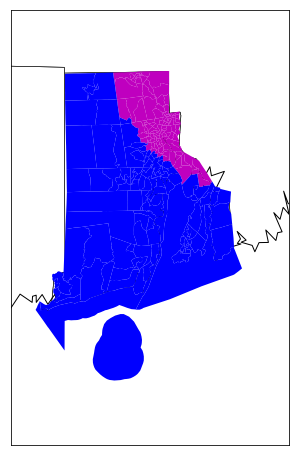

In [1]:
from gurobipy import *
import utils
from math import radians, sin, cos, acos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# install basemap with: sudo -H pip3 install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


totalVoters = 429697


def readDataBlock():
    dataDir = "../census_data/"
    # file with population data
    populationFile = "/DEC_10_PL_P3_with_ann.csv"
    # file with geographical data
    geoFile = "/DEC_10_PL_G001_with_ann.csv"
    # file with the congressional districts per block
    cdFile = "../cd115/44_RI_CD115.txt"

    dirs = utils.getSubdirs(dataDir)
    blocks = []
    # get all of the blocks into one list
    for d in dirs:
        block,popData,geoData = utils.getBlocks(dataDir + d + populationFile,dataDir + d + geoFile,cdFile)
        blocks = blocks + block

    # read the political data
    fipsDataFile = "../census_data/st44_ri_cou.txt"
    poliDataFile = "../political_data/US_elect_county.csv"
    counties = utils.getPoliDataByCounty(poliDataFile, fipsDataFile)
    return (blocks, counties)


def readData():
    dataDir = "../census_data_tract"
    # file with population data
    populationFile = "/DEC_10_PL_P3_with_ann.csv"
    # file with geographical data
    geoFile = "/DEC_10_PL_G001_with_ann.csv"
    # file with the congressional districts per block
    cdFile = "../cd115/44_RI_CD115.txt"

    blocks, popData, geoData = utils.getBlocks(dataDir + populationFile, dataDir + geoFile, cdFile)

    # read the political data
    fipsDataFile = "../census_data/st44_ri_cou.txt"
    poliDataFile = "../political_data/US_elect_county.csv"
    counties = utils.getPoliDataByCounty(poliDataFile,fipsDataFile)
    return (blocks, counties)


def getDistance(block, district):
    slat = radians(float(block["Latitude"]))
    slon = radians(float(block["Longitude"]))
    elat = radians(float(district["Latitude"]))
    elon = radians(float(district["Longitude"]))

    dist = 6371.01 * acos(sin(slat) * sin(elat) + cos(slat) * cos(elat) * cos(slon - elon))
    return dist


def getCostsArcsCapacity(blocks, districts):
    f = np.empty((len(blocks), len(districts)))
    arcs = tuplelist()
    capacity = {}
    totalPop = 0
    maxPop = 0
    for i,block in enumerate(blocks):
        pop = block["Population"]
        totalPop += pop
        if pop > maxPop:
            maxPop = pop
        for j, district in enumerate(districts):
            f[i, j] = getDistance(block, district)
            arc = (i, j)
            arcs.append(arc)
            capacity[arc] = pop

    return (f, arcs, capacity, totalPop, maxPop)


def drawMap(solution, m):
    colors = ['m', 'b']
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    map = Basemap(llcrnrlon=-72, llcrnrlat=40.9, urcrnrlon=-70.9, urcrnrlat=42.2,
                  resolution='i', area_thresh=5000., projection='lcc',
                  lat_1=40., lon_0=-071., ax=ax)
    map.drawcoastlines()
    map.drawcountries()
    map.drawstates()

#    map.readshapefile('../census_block_shape_files/tl_2010_44_tabblock10', 'tl_2010', drawbounds=False)
    map.readshapefile('../census_tract_shape_files/tl_2010_44_tract10', 'tl_2010', drawbounds=False)

    patches = []
    for i in range(m):
        patches.append([])

    for info, shape in zip(map.tl_2010_info, map.tl_2010):
        id = info['GEOID10']
        district = solution[id]
        patches[district].append(Polygon(np.array(shape), True))

    for i in range(m):
        ax.add_collection(PatchCollection(patches[i], facecolor=colors[i], edgecolor='k', linewidths=0., zorder=2))

    plt.show()


def analyzeSolution(counties, blocks, solution, n, m):
    sol_map = {}
    tractResult = []
    popResult = []
    raceResult = []
    polResult = []
    county_result = []
    county_total = {}
    for county in counties:
        county_total[county["County"]] = 0
    for j in range(m):
        totalPop = 0
        numAssigned = 0
        white = 0
        black = 0
        asian = 0
        native = 0
        island = 0
        other = 0
        county_distr = {}
        for county in counties:
            county_distr[county["County"]] = 0
        for i in range(n):
            if solution[i, j] > 0:
                block = blocks[i]
                pop = block["Population"]
                #blocks_assigned.append(i)
                totalPop += pop
                numAssigned += 1
                sol_map[str(block['Id2'])] = j
                county_distr[block["County"]] += pop
                county_total[block["County"]] += pop
                white += block["Race"]["white"]
                black += block["Race"]["black"]
                asian += block["Race"]["asian"]
                native += block["Race"]["native"]
                island += block["Race"]["island"]
                other += block["Race"]["other"]
        popResult.append(totalPop)
        tractResult.append(numAssigned)
        raceResult.append({"white": white, "black": black, "asian": asian, "native": native, "island": island, "other": other})
        county_result.append(county_distr)
        print("For district " + str(j) + ": the population is " + str(totalPop))
        # + " and the assigned blocks are " + str(blocks_assigned) + "\n")
    for i in range(m):
        county_distr = county_result[i]
        obama_total = 0
        romney_total = 0
        for county in counties:
            name = county["County"]
            percent = float(county_distr[name]) / county_total[name]
            obama_total += county["Obama vote"] * percent
            romney_total += county["Romney vote"] * percent
        polResult.append({"Obama": obama_total, "Romney": romney_total, "total": obama_total+romney_total})
    return (sol_map, popResult, tractResult, raceResult, polResult)


def calcMetrics(popResult, raceResult, polResult, m):
    metrics = []
    for i in range(m):
        pop = popResult[i]
        perWhite = raceResult[i]["white"] / pop * 100.0
        perBlack = raceResult[i]["black"] / pop * 100.0
        perAsian = raceResult[i]["asian"] / pop * 100.0
        perNative = raceResult[i]["native"] / pop * 100.0
        perIsland = raceResult[i]["island"] / pop * 100.0
        perOther = raceResult[i]["other"] / pop * 100.0
        perObama = polResult[i]["Obama"] / polResult[i]["total"] * 100.0
        perRomney = polResult[i]["Romney"] / polResult[i]["total"] * 100.0
        metrics.append({"perWhite": perWhite, "perBlack": perBlack, "perAsian": perAsian,
                        "perNative": perNative, "perIsland": perIsland, "perOther": perOther,
                        "perObama": perObama, "perRomney": perRomney})
    totalMetrics = {"white": quicksum(raceResult[i]["white"] for i in range(m)) / totalPop * 100.0,
                    "black": quicksum(raceResult[i]["black"] for i in range(m)) / totalPop * 100.0,
                    "asian": quicksum(raceResult[i]["asian"] for i in range(m)) / totalPop * 100.0,
                    "native": quicksum(raceResult[i]["native"] for i in range(m)) / totalPop * 100.0,
                    "island": quicksum(raceResult[i]["island"] for i in range(m)) / totalPop * 100.0,
                    "other": quicksum(raceResult[i]["other"] for i in range(m)) / totalPop * 100.0,
                    "Obama": quicksum(polResult[i]["Obama"] for i in range(m)) / totalVoters * 100.0,
                    "Romney": quicksum(polResult[i]["Romney"] for i in range(m)) / totalVoters * 100.0,
                    }
    return (metrics, totalMetrics)


def assign(blocks, districts, neighbors, n, m):
    # cost function f(i,j) is the euclidian distance from block i to district j 

    (f, arcs, capacity, totalPop, maxPop) = getCostsArcsCapacity(blocks, districts)
    #print(f)
    #print(capacity)

    print(totalPop)
    M = maxPop * 10
    alpha = .05
    p = totalPop / m
    pop_cost = 5
    distance_cost = 100

    # Create optimization model
    model = Model('netflow')

    # Create variables
    flow = model.addVars(n, m, name="flow") # flow(i,j) = number of people from block i assigned to district j
    indic = model.addVars(n, m, vtype=GRB.BINARY, name="indic") # indic(i,j) is an indicator of whether block i is assigned to district j
    smallest = model.addVar(name="min")     # smallest district
    largest = model.addVar(name="max")      # largest district
    gap = model.addVar(name="gap")          # difference between largest and smallest

    # Objective function
    model.setObjective((distance_cost * quicksum(f[i,j] * blocks[i]["Population"] * indic[i,j] for i in range(n) for j in range(m)) +
                       pop_cost * gap), GRB.MINIMIZE)

    # Constraints
    # to ensure all blocks are allocated and no splitting allowed
    model.addConstrs( (flow.sum(i,'*') == blocks[i]["Population"] for i in range(n)), "node")
    model.addConstrs((flow[i, j] <= M * indic[i, j] for i in range(n) for j in range(m)))
    model.addConstrs((indic.sum(i, '*') == 1 for i in range(n)))

    # Population related constraints to help achieve equal sizes
    model.addConstrs( smallest <= flow.sum('*', j) for j in range(m))
    model.addConstrs( largest >= flow.sum('*', j) for j in range(m))
    model.addConstr(gap == largest - smallest)
    for k in range(m):
        # constraint (10)
        model.addConstr( quicksum(blocks[i]['Population'] * indic[i,k] for i in range(n)) >= (1-alpha)*p )
        # constraint (11)
        model.addConstr( quicksum(blocks[i]['Population'] * indic[i,k] for i in range(n)) <= (1+alpha)*p )

    # add continuity constraints
    w = model.addVars(n,m, name="hub_indicators",vtype = GRB.BINARY)
    # only one hub per district. This is constraint (2)
    for k in range(m):
        model.addConstr(quicksum(w[i,k] for i in range(n)) == 1)
        
    # y_i_j is a decision variable that indicates the amount of flow from block i to block j
    # y must be nonnegative
    # will add y variables dynamically only when we find a pair
    y = {}

    # constraint (3) (specifically  (21) from the examples)
    for k in range(m):
        for i in range(n):
            # neighbors is the list of blocks adjacent to i.
            flowInto = LinExpr()
            neighborsOfI = neighbors[i]
            for j in neighborsOfI:
                # add the flow variable dynamically for the found pairs
                # variable must be non negative
                y[(j,i,k)] = model.addVar(name="flow_%d_%d_%d" % (j,i,k),lb=0)
                flowInto.add(y[(j,i,k)])
            model.addConstr(flowInto <= (n - 1) * indic[i,k])

    # constraint (1) ((20) from the examples)
    for k in range(m):
        for i in range(n):
            neighborsOfI = neighbors[i]
            netFlow = LinExpr()
            for j in neighborsOfI:
                netFlow.add(y[(i,j,k)] - y[(j,i,k)])
                #model.addConstr(netFlow >= (indic[i,k] - n * w[i,k]))
                # IS THIS SUPPOSED TO BE COMMENTED? if so, we can remove this entire chunk

    model.optimize()

    # Print solution
    if model.status == GRB.Status.OPTIMAL:
        solution = model.getAttr('x', indic)
        #print(solution)
    else:
        solution = []
    return(totalPop, solution)


# get the districtCenter by minimizing the population weighted squared
# distances between electoralDistricts and blocks
def getDistrictCenters(blocks,u,districtList):
    I = len(blocks)
    J = len(districtList)
    
    # collection of the x and y coordinates of the district centers
    districtCenterCoords={}
    for j in range(J):
        districtId = districtList[j]
        # finding the center for each district is an optimization problem
        model = Model('District_%d_Centers' % j)
        # by default gurobi wants optimal solutions to be non negative
        x = model.addVar(lb = -360,name="x_%d" % j)
        y = model.addVar(name="y_%d" % j)
        objective = QuadExpr()
        for i in range(I):
            block = blocks[i]
            blockId = block['Id2']
            x_i = float(block['Longitude'])
            y_i = float(block['Latitude'])
            u_i = u[i]
            if(u_i['Id2'] != blockId):
                raise ValueError('There is a mismatch in the blockIds at i=%d' % i)
            u_i_j = u_i[districtId]
            objective.add(u_i_j * ( (x-x_i)*(x-x_i) + (y-y_i)*(y-y_i)))
        model.setObjective(objective)
        model.setParam( 'OutputFlag', False )
        model.optimize()
        districtCenterCoords[districtId] = (x.X,y.X)
    return districtCenterCoords

        


# In[5]:
(blocks, counties) = readData()

# In[2]:
u = utils.getNumBlockInDistrict(blocks)

# convert districts into correct format
districtList= [1,2]
districtCenters = getDistrictCenters(blocks,u,districtList)
print(districtCenters)
districts = [{'Latitude': districtCenters[1][1], 'Longitude': districtCenters[1][0]},
             {'Latitude': districtCenters[2][1], 'Longitude': districtCenters[2][0]}]

n = len(blocks)
m = len(districts)

#shapesDir = "../census_block_shape_files/tl_2010_44_tabblock10"
shapesDir = "../census_tract_shape_files/tl_2010_44_tract10"
indexMapping = utils.getIndexMapping(blocks)
neighbors,neighborsByIndex = utils.getNeighbors(shapesDir,indexMapping)

(totalPop, solution) = assign(blocks, districts, neighborsByIndex, n, m)
(sol_map, popResult, tractResult, raceResult, polResult) = analyzeSolution(counties, blocks, solution, n, m)
print(popResult)
print(tractResult)
print(raceResult)
print(polResult)
(metrics, totalMetrics) = calcMetrics(popResult, raceResult, polResult, m)
print(metrics)
print(totalMetrics)
drawMap(sol_map, m)